In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
path = os.getcwd()

In [2]:
path

'D:\\pokemon\\Pokemon Types'

In [3]:
data = pd.read_csv(os.path.join(path, "data", "diabetes.csv"))

In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
#information about datas
def info_data(x):
    shapes = x.shape
    print("Rows are {0} and Columns are {1}".format(shapes[0],shapes[1]))
    sns.heatmap(x.isnull(), cbar=False)
    print(x.info())
    

Rows are 768 and Columns are 9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
None


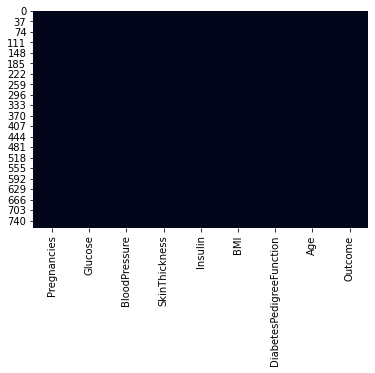

In [6]:
print(info_data(data))

In [7]:
color_wheel = {1: " #311ecf ", 
               2: "#7bc043"}

0    500
1    268
Name: Outcome, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


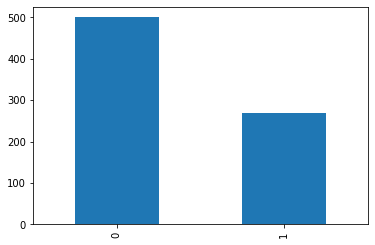

In [8]:
data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(data.Outcome.value_counts())
p=data.Outcome.value_counts().plot(kind="bar")
print(p)

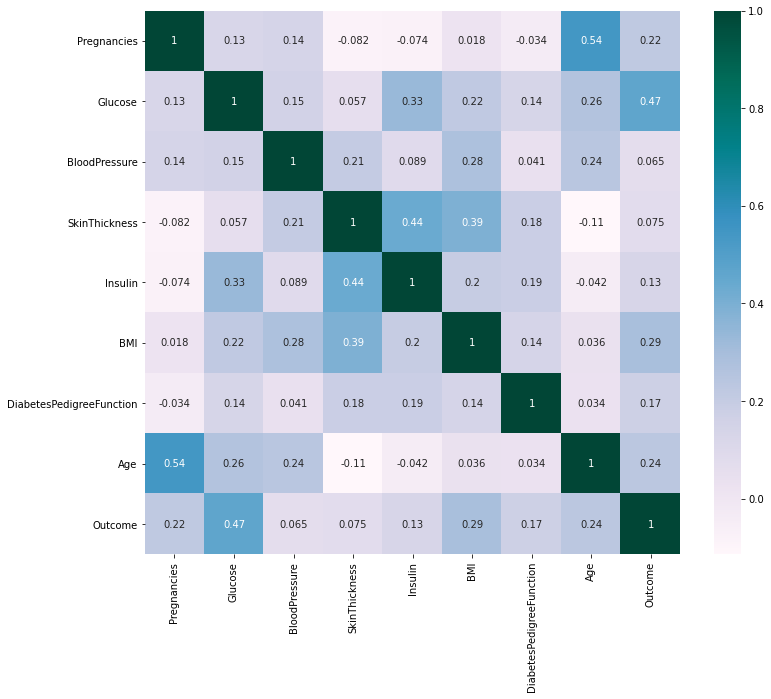

In [9]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(data.corr(), annot=True,cmap ='PuBuGn')  # seaborn has very simple solution for heatmap

In [10]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()


In [11]:
X = sc_X.fit_transform(data.drop(["Outcome"],axis = 1))

In [117]:
X.reshape(-1,1)

array([[ 0.63994726],
       [ 0.84832379],
       [ 0.14964075],
       ...,
       [-0.20212881],
       [-0.47378505],
       [-0.87137393]])

In [12]:
y = data.Outcome

In [13]:
test_size = 0.33

from sklearn.model_selection import train_test_split
#pip install -U scikit-learn
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size)

In [18]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [19]:
print(train_scores,test_scores)

[1.0, 0.8287937743190662, 0.8540856031128404, 0.8229571984435797, 0.8268482490272373, 0.7996108949416343, 0.811284046692607, 0.7879377431906615, 0.7898832684824902, 0.7762645914396887, 0.7723735408560312, 0.7723735408560312, 0.7723735408560312, 0.7782101167315175] [0.7007874015748031, 0.7086614173228346, 0.7244094488188977, 0.7204724409448819, 0.7086614173228346, 0.7362204724409449, 0.7519685039370079, 0.7716535433070866, 0.7598425196850394, 0.7519685039370079, 0.7480314960629921, 0.7401574803149606, 0.7519685039370079, 0.7362204724409449]


In [20]:
train_scores

[1.0,
 0.8287937743190662,
 0.8540856031128404,
 0.8229571984435797,
 0.8268482490272373,
 0.7996108949416343,
 0.811284046692607,
 0.7879377431906615,
 0.7898832684824902,
 0.7762645914396887,
 0.7723735408560312,
 0.7723735408560312,
 0.7723735408560312,
 0.7782101167315175]

In [21]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [22]:
## score that comes from testing on the same datapoints that were used for training
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max train score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max train score 77.16535433070865 % and k = [8]


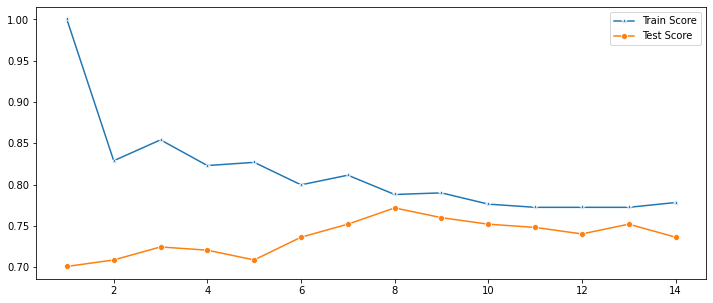

In [23]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [24]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7480314960629921

In [36]:
X.reshape[89]

TypeError: 'builtin_function_or_method' object is not subscriptable

In [45]:
y_predict_proba  = knn.predict_proba(X_test)

In [39]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,143,27,170
1,37,47,84
All,180,74,254


Text(0.5, 15.0, 'Predicted label')

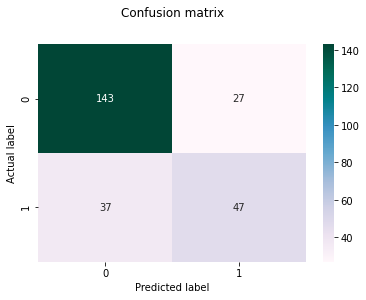

In [41]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="PuBuGn" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       170
           1       0.64      0.56      0.59        84

    accuracy                           0.75       254
   macro avg       0.71      0.70      0.71       254
weighted avg       0.74      0.75      0.74       254



In [53]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
y_pred_proba = knn.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred_proba)


0.8004201680672269

In [52]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

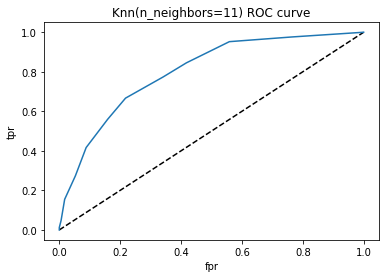

In [54]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [57]:
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7669892199303965
Best Parameters: {'n_neighbors': 17}
